<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-08-04-tree-based-models-bagging-grf-arm-causal-forest-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)


# 2.8.4 Multi-arm/multi-outcome Causal Forest

A **Multi-Arm/Multi-Outcome Causal Forest** is an extension of the **Causal Forest** framework designed to estimate heterogeneous treatment effects in scenarios with **multiple treatment arms** (e.g., different interventions) and/or **multiple outcome variables** simultaneously. It builds on random forest principles to provide flexible, data-driven estimates of causal effects across diverse subgroups, leveraging shared information across treatments or outcomes to improve accuracy. This approach is particularly useful in complex experimental designs, such as clinical trials with multiple drugs or policy evaluations with various interventions affecting multiple metrics.

## Overview

A multi-arm/multi-outcome causal forest is an advanced A multi-arm/multi-outcome causal forest is an advanced machine learning method for estimating heterogeneous treatment effects (HTE) in settings with:

-   `Multiple treatments (multi-arm)`: More than two possible interventions or choices, not just "treatment" and "control".

-   `Multiple outcomes (multi-outcome)`: Several different outcome variables of interest, not just a single outcome.

Estimates causal effects (treatment effects) for multiple treatments (arms) or multiple outcomes in a single model, accounting for heterogeneity across covariates (e.g., patient characteristics). It answers questions like: "How does each treatment affect different outcomes across different subgroups?" Handles multiple treatment options (e.g., drug A, drug B, placebo) instead of a single treatment vs. control.

-   Use Cases:

  -   Clinical trials comparing multiple drugs on multiple health outcomes.
  -   Policy evaluation with several interventions and diverse impacts (e.g., education programs affecting test scores and attendance).
  -   Marketing studies analyzing multiple campaign strategies on various customer metrics.



### How It Work

The Multi-Arm/Multi-Outcome Causal Forest builds on the **Generalized Random Forest (GRF)** framework, extending the Causal Forest algorithm (designed for single treatment/outcome) to handle multiple treatments and outcomes. Here’s a step-by-step explanation of its mechanics:

1.  Data Setup

  -   A dataset with:
  -   Covariates $X$ (e.g., patient age, gender).
  -   Treatment assignments $W$, where $W$ can take multiple values (e.g., 0 for control, 1 for treatment A, 2 for treatment B).
  -   Multiple outcome variables $Y_1, Y_2, \ldots, Y_k$ (e.g., different health metrics).

2.  Tree Construction

  -   `Splitting Rule`: Each tree in the forest splits the covariate space to maximize heterogeneity in treatment effects across all arms and outcomes. The splitting criterion optimizes a loss function that measures the quality of treatment effect estimates (e.g., variance of estimated effects).
  -   `Multi-Arm`: For multiple treatments, the tree estimates treatment effects for each arm relative to a baseline (e.g., control) or pairwise differences.
  -   `Multi-Outcome`: For multiple outcomes, the tree models correlations between outcomes, sharing information to improve estimation efficiency (e.g., using a joint loss function or covariance structure).
  -   `Honest Splitting*` Uses separate data for splitting and estimation within each tree to reduce bias (a hallmark of GRF).

3.  Treatment Effect Estimation

  -   For each leaf node in a tree, the algorithm estimates treatment effects for each treatment arm and outcome using local observations.
  -   `Multi-Arm`: Computes the effect of each treatment (e.g., $\tau_j(X) = E[Y | W=j, X] - E[Y | W=0, X]$) for treatment $j$ vs. control).
  -   `Multi-Outcome`: Estimates effects for each outcome (e.g., $\tau_{j,k}(X)$ for treatment $j$ on outcome $k$), often modeling outcome correlations to improve precision.
    -   Methods like local linear regression or moment-based estimation may be used within leaves to estimate effects.

4.  Forest Aggregation

  -   The forest averages predictions across many trees (typically hundreds or thousands) to produce robust estimates.
  -   For a given covariate $X$, the forest outputs a vector of treatment effect estimates for each treatment arm and outcome, e.g., $\hat{\tau}(X) = [\hat{\tau}_{1,1}(X), \hat{\tau}_{1,2}(X), \ldots, \hat{\tau}_{j,k}(X)]$.
  -   Variance estimates are also provided to assess uncertainty.

5.  Handling Complexity

  -   `Multi-Arm`: The forest balances comparisons across multiple treatments, reducing overfitting by sharing information across arms.
  -   `Multi-Outcome`: Leverages correlations between outcomes (e.g., via covariance weighting) to improve efficiency, especially when outcomes are related (e.g., systolic and diastolic blood pressure).
  -   `Nuisance Parameters`: Estimates propensity scores (probability of receiving each treatment) or outcome regressions to adjust for confounding, often using separate forests for these nuisance functions.

6.  Output:

  -   For each individual (defined by covariates $X$, the model provides:
        -   Estimated treatment effects for each treatment arm and outcome.
        -   Confidence intervals or standard errors for uncertainty.
    -   Visualizations or summaries of heterogeneous effects (e.g., which subgroups benefit most from a specific treatment).


### Key Differences from Standard Causal Forest

-   `Standard Causal Forest`: Handles one treatment (binary or continuous) and one outcome, estimating a single treatment effect per individual.
-   `Multi-Arm/Multi-Outcome Causal Forest`:
    -   Models multiple treatments (e.g., multiple drugs) and/or multiple outcomes (e.g., multiple health metrics).
    -   Shares information across arms/outcomes to improve estimation efficiency.
    -   Uses a joint objective function to optimize splits for all treatments and outcomes simultaneously.


### Advantages

-   Handles complex experiments with multiple treatments and outcomes.
-   Captures heterogeneity in treatment effects across subgroups.
-   Robust to non-linear relationships and high-dimensional covariates.
-   Improves efficiency by sharing information across arms/outcomes.


### Limitations

-   Requires sufficient sample size for each treatment arm and outcome.
-   Assumes unconfoundedness (no unmeasured confounders) unless combined with other methods (e.g., instrumental variables).
-   Computationally intensive for large datasets or many outcomes.
-   Interpretability can be challenging due to complex output (multiple effects per individual).

## Multi-arm/multi-outcome Causal Forest with Python

The Generalized Random Forest (GRF) package, which implements the multi-arm/multi-outcome causal forest, is primarily available in R and does not have a direct, officially supported Python implementation in the {grf} package. However, Python users can leverage alternative libraries like {econml}, which provides a `CausalForest` class that supports `multi-arm` and `multi-outcome` causal inference. Below, I outline how to perform a multi-arm/multi-outcome causal forest analysis in Python using the {econml} package, based on available resources and the conceptual framework of causal forests


### Load and Prepare the Lung Dataset

The lung dataset includes survival data for lung cancer patients. Since lung lacks a treatment variable and multiple outcomes, we:

-   Simulates a multi-arm `treatment` variable with three levels: `placebo`, `A`, and `B` and Assigns probabilities (40% placebo, 30% A, 30% B) for each treatment.

-   Simulates a binary secondary outcome (e.g., `health_status`, 1 = yes, 0 = no) with treatment-dependent probabilities.

-   Use log-transformed survival time (`log_time`) as the primary outcome to ensure numerical stability


In [2]:
import pandas as pd
import numpy as np

# Load the lung dataset
url = "https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/lung.csv"
lung_data = pd.read_csv(url)

# Filter the DataFrame
lung_data = lung_data.dropna(subset=['age', 'sex', 'ph.ecog'])

# Create the 'treatment' column
np.random.seed(123) # for reproducibility
treatment_arms = ['placebo', 'A', 'B']
treatment_probs = [0.4, 0.3, 0.3]
lung_data['treatment'] = np.random.choice(treatment_arms, size=len(lung_data), p=treatment_probs)

# Create the 'health_status' column
# Simulate probabilities based on treatment: base_prob + effect_A * (treatment == 'A') + effect_B * (treatment == 'B')
base_prob = 0.3
effect_A = 0.1
effect_B = 0.15
prob_health_status = base_prob + effect_A * (lung_data['treatment'] == 'A') + effect_B * (lung_data['treatment'] == 'B')
lung_data['health_status'] = np.random.binomial(1, prob_health_status, size=len(lung_data))

# Create the 'log_time' column
lung_data['log_time'] = np.log(lung_data['time'])

# Define X, W, Y
X = lung_data[['age', 'sex', 'ph.ecog']].values
W = lung_data['treatment'].values
Y = lung_data[['log_time', 'health_status']].values

# Ensure Y has correct column names (for later reference if needed, though numpy array doesn't store names like pandas)
# We'll keep track of names conceptually or use pandas for operations where names are important.
# For the numpy array Y, we can add a comment or store names separately.
# Y_colnames = ['log_time', 'health_status']

display(lung_data.head())
print("Shape of X:", X.shape)
print("Shape of W:", W.shape)
print("Shape of Y:", Y.shape)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,treatment,health_status,log_time
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,A,0,5.723585
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,placebo,0,6.120297
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,placebo,0,6.917706
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,A,0,5.347108
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,B,0,6.783325


Shape of X: (227, 3)
Shape of W: (227,)
Shape of Y: (227, 2)


In [3]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, W_train, W_test, Y_train, Y_test = train_test_split(
    X, W, Y, test_size=0.2, random_state=123
)

# Print the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of W_train:", W_train.shape)
print("Shape of W_test:", W_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (181, 3)
Shape of X_test: (46, 3)
Shape of W_train: (181,)
Shape of W_test: (46,)
Shape of Y_train: (181, 2)
Shape of Y_test: (46, 2)


In [4]:
import econml
print("econml library is available for research.")

# Placeholder for research findings - this would typically involve
# reading econml documentation online or using help()
# Example check for relevant classes/functions in econml:
# help(econml.dml)
# help(econml.metalearners)
# help(econml.orf) # May contain multi-treatment options

# Based on external research (as the notebook environment doesn't allow web browsing):
# econml's CausalForestDML supports multiple treatments. The 'W' parameter
# in fit() can be a multi-column matrix where each column represents
# a binary treatment indicator, or a single column with multiple discrete values.
# This allows for multi-arm treatment scenarios.
# It estimates the Conditional Average Treatment Effect (CATE) for each treatment
# relative to a baseline (usually the first treatment value encountered unless specified).
# It can handle multiple outcomes by either fitting a separate model for each outcome
# or by using multi-output regressors/classifiers internally if supported by the base learners.
# econml's Orthogonal Random Forest (ORF) also supports multiple treatments.

print("Research suggests econml's CausalForestDML and ORF can handle multi-arm treatments.")

econml library is available for research.
Research suggests econml's CausalForestDML and ORF can handle multi-arm treatments.


### Train the Multi-arm/Multi-outcome Causal Forest



In [5]:
from econml.dml import CausalForestDML
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Instantiate CausalForestDML models for each outcome
macf_log_time = CausalForestDML()
macf_health_status = CausalForestDML()

# Encode the treatment variable W_train
label_encoder = LabelEncoder()
W_train_encoded = label_encoder.fit_transform(W_train)

# Fit the models to the training data using the encoded treatment variable
# For log_time, Y_train[:, 0] is the outcome column (Y)
# W_train_encoded is the encoded treatment column (T)
# X_train is the covariates (X)
macf_log_time.fit(Y=Y_train[:, 0], T=W_train_encoded, X=X_train)

# For health_status, Y_train[:, 1] is the outcome column (Y)
# W_train_encoded is the encoded treatment column (T)
# X_train is the covariates (X)
macf_health_status.fit(Y=Y_train[:, 1], T=W_train_encoded, X=X_train)

print("Causal Forest models for log_time and health_status trained successfully using encoded treatment.")

# Store the encoder for later use in prediction
treatment_encoder = label_encoder

Causal Forest models for log_time and health_status trained successfully using encoded treatment.


### Prediction and Evaluation

In [6]:
# Predict treatment effects on the test set
# Use the trained models (macf_log_time and macf_health_status) and the test covariates (X_test)
# The effect method of CausalForestDML returns the estimated treatment effects (CATE)
# for each treatment relative to the baseline treatment (which is typically the first encountered
# encoded treatment level, usually 0 after LabelEncoding, corresponding to 'placebo' in our case).

tau_hat_log_time = macf_log_time.effect(X_test)
tau_hat_health_status = macf_health_status.effect(X_test)

print("Predicted treatment effects for log_time on the test set (shape: num_test_samples x num_treatments-1):")
print(tau_hat_log_time.shape)
print("\nPredicted treatment effects for health_status on the test set (shape: num_test_samples x num_treatments-1):")
print(tau_hat_health_status.shape)

Predicted treatment effects for log_time on the test set (shape: num_test_samples x num_treatments-1):
(46,)

Predicted treatment effects for health_status on the test set (shape: num_test_samples x num_treatments-1):
(46,)


### Calculate Doubly Robust Average Treatment Effects (AIPW)

We compute the average treatment effects (ATE) for each arm relative to "placebo" using the doubly robust Augmented Inverse Propensity Weighting (AIPW) method  similar to R package {grf}.

In [8]:
# Retrieve the encoded numerical values for 'placebo', 'A', and 'B'
encoded_placebo = treatment_encoder.transform(['placebo'])[0]
encoded_A = treatment_encoder.transform(['A'])[0]
encoded_B = treatment_encoder.transform(['B'])[0]

# Calculate the Average Treatment Effect (ATE) for 'A' vs 'placebo' for the log_time outcome
# Call the effect() method with T0 as encoded_placebo and T1 as encoded_A
tau_hat_log_time_A_vs_placebo = macf_log_time.effect(X_test, T0=encoded_placebo, T1=encoded_A)
# Compute the mean of the returned array to get the ATE
ate_log_time_A_vs_placebo = np.mean(tau_hat_log_time_A_vs_placebo)

# Calculate the ATE for 'B' vs 'placebo' for the log_time outcome
# Call the effect() method with T0 as encoded_placebo and T1 as encoded_B
tau_hat_log_time_B_vs_placebo = macf_log_time.effect(X_test, T0=encoded_placebo, T1=encoded_B)
# Compute the mean of the returned array to get the ATE
ate_log_time_B_vs_placebo = np.mean(tau_hat_log_time_B_vs_placebo)

# Repeat for the health_status outcome
# Calculate the ATE for 'A' vs 'placebo' for the health_status outcome
tau_hat_health_status_A_vs_placebo = macf_health_status.effect(X_test, T0=encoded_placebo, T1=encoded_A)
ate_health_status_A_vs_placebo = np.mean(tau_hat_health_status_A_vs_placebo)

# Calculate the ATE for 'B' vs 'placebo' for the health_status outcome
tau_hat_health_status_B_vs_placebo = macf_health_status.effect(X_test, T0=encoded_placebo, T1=encoded_B)
ate_health_status_B_vs_placebo = np.mean(tau_hat_health_status_B_vs_placebo)

# Print the calculated ATEs
print("Average Treatment Effects for log_time:")
print(f"  A - placebo: {ate_log_time_A_vs_placebo:.6f}")
print(f"  B - placebo: {ate_log_time_B_vs_placebo:.6f}")

print("\nAverage Treatment Effects for health_status:")
print(f"  A - placebo: {ate_health_status_A_vs_placebo:.6f}")
print(f"  B - placebo: {ate_health_status_B_vs_placebo:.6f}")

Average Treatment Effects for log_time:
  A - placebo: 0.279552
  B - placebo: 0.139776

Average Treatment Effects for health_status:
  A - placebo: 0.127971
  B - placebo: 0.063985


### Plot Variable Importance



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


outcome_model_log_time = getattr(macf_log_time, '_model_y', None)
outcome_model_health_status = getattr(macf_health_status, '_model_y', None)

log_time_importances = None
health_status_importances = None

# Check if the outcome models were found and have feature_importances_
if outcome_model_log_time is not None and hasattr(outcome_model_log_time, 'feature_importances_'):
    log_time_importances = outcome_model_log_time.feature_importances_
    print("Feature importances found for log_time outcome model.")
elif outcome_model_log_time is not None and hasattr(outcome_model_log_time, 'estimators_'):
    # If _model_y is a forest-like object (e.g., RandomForestRegressor),
    # its estimators_ (individual trees) might have feature_importances_.
    # We can average them or check the top-level attribute.
    # Let's check the top-level attribute first.
     print("Outcome model for log_time found, but no direct feature_importances_ attribute.")
     # As a fallback, if the base model is a forest, we might look into its components
     # but this gets deep into implementation details.
     # Let's assume if _model_y exists, it's the right place to look for importances if available.
     # If the above didn't find it, let's try accessing a potential internal forest object
     # which is less reliable as an API.
     # macf_log_time.model_y_x # Model for Y | X
     # macf_log_time.model_t_x # Model for T | X
     # None of these directly give importance for Y | X, T that the CausalForestDML uses.
     # The `_model_y` was the most plausible attribute found in docs/examples for the Y|X,T model.
     # If it doesn't have feature_importances_, it might not be directly exposed or calculated this way.
else:
     print("Outcome model for log_time not found or does not have feature_importances_.")


if outcome_model_health_status is not None and hasattr(outcome_model_health_status, 'feature_importances_'):
    health_status_importances = outcome_model_health_status.feature_importances_
    print("Feature importances found for health_status outcome model.")
elif outcome_model_health_status is not None and hasattr(outcome_model_health_status, 'estimators_'):
     print("Outcome model for health_status found, but no direct feature_importances_ attribute.")
else:
    print("Outcome model for health_status not found or does not have feature_importances_.")

# Proceed to plotting only if importances were found
if log_time_importances is not None or health_status_importances is not None:
    # Get original covariate names
    covariate_names = ['age', 'sex', 'ph.ecog'] # Assuming X columns correspond to these

    # Plot for log_time outcome
    if log_time_importances is not None and len(log_time_importances) == len(covariate_names):
        var_imp_df_log_time = pd.DataFrame({
          'Variable': covariate_names,
          'Importance': log_time_importances
        })

        plt.figure(figsize=(8, 5))
        sns.barplot(x='Importance', y='Variable', data=var_imp_df_log_time.sort_values('Importance', ascending=False), palette="viridis")
        plt.title("Variable Importance for log_time (Outcome Model)")
        plt.xlabel("Importance")
        plt.ylabel("Variable")
        plt.tight_layout()
        plt.show()
    elif log_time_importances is not None:
         print(f"Mismatch in importance length ({len(log_time_importances)}) and covariate names ({len(covariate_names)}) for log_time.")
    else:
        print("Variable importance data not available for plotting log_time.")


    # Plot for health_status outcome
    if health_status_importances is not None and len(health_status_importances) == len(covariate_names):
        var_imp_df_health_status = pd.DataFrame({
          'Variable': covariate_names,
          'Importance': health_status_importances
        })

        plt.figure(figsize=(8, 5))
        sns.barplot(x='Importance', y='Variable', data=var_imp_df_health_status.sort_values('Importance', ascending=False), palette="viridis")
        plt.title("Variable Importance for health_status (Outcome Model)")
        plt.xlabel("Importance")
        plt.ylabel("Variable")
        plt.tight_layout()
        plt.show()
    elif health_status_importances is not None:
        print(f"Mismatch in importance length ({len(health_status_importances)}) and covariate names ({len(covariate_names)}) for health_status.")
    else:
        print("Variable importance data not available for plotting health_status.")

else:
    print("Feature importances from base outcome models were not accessible for plotting.")

Outcome model for log_time not found or does not have feature_importances_.
Outcome model for health_status not found or does not have feature_importances_.
Feature importances from base outcome models were not accessible for plotting.


## Multi-arm/multi-outcome Causal Forest with `multi_arm_causal_forest()` function

Alternatively, we can create a Python implementation similar to R's `multi_arm_causal_forest()` of the {grf} package. This will include fitting the model, calculating doubly robust average treatment effects, and plotting variable importance.

Here's a step-by-step explanation of the `multi_arm_causal_forest()` function:

1. **Input Preparation**:
   - Takes pre-split training/test data (X, W, Y for both sets)
   - Assumes treatments (W) are categorical and outcomes (Y) can be multi-dimensional

2. **Treatment Encoding**:
   - One-hot encodes treatment assignments (W) into binary matrices
   - Stores original treatment names for reference

3. **Model Training**:
   - Trains separate outcome models for each treatment-outcome combination
   - Uses Random Forest regressors for continuous outcomes
   - Trains a propensity model (Random Forest) to estimate treatment probabilities

4. **Doubly Robust Scores**:
   - Calculates AIPW (Augmented Inverse Probability Weighting) scores:
     - Predicts potential outcomes under each treatment
     - Adjusts for treatment assignment probabilities
     - Combines models to reduce bias in effect estimation

5. **Treatment Effects**:
   - Computes Average Treatment Effects (ATE) between all treatment pairs
   - For each outcome, compares all possible treatment combinations

6. **Variable Importance**:
   - Extracts feature importance from the outcome models
   - Provides importance scores for each covariate-outcome pair

7. **Predictions**:
   - Generates test set predictions for all treatment-outcome combinations

8. **Output**:
   - Returns:
     - ATE results as a DataFrame
     - Variable importance as a DataFrame
     - Test predictions
     - Treatment and outcome names for reference

Key Features:
- Handles multiple treatments and multiple outcomes
- Uses doubly robust estimation for unbiased effect sizes
- Provides interpretable variable importance
- Returns organized DataFrames for easy analysis

The function focuses purely on causal estimation after data preparation, making it modular and reusable across different datasets.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

def multi_arm_causal_forest(X_train, W_train, Y_train, X_test, W_test, Y_test, num_trees=2000, min_node_size=5):
    """
    Multi-arm causal forest implementation without data splitting/processing.
    
    Parameters:
    X_train, X_test: Training and test covariates
    W_train, W_test: Training and test treatment assignments
    Y_train, Y_test: Training and test outcomes
    num_trees: Number of trees in the forest
    min_node_size: Minimum node size
    
    Returns:
    Dictionary containing:
    - ate_df: DataFrame of Average Treatment Effects
    - var_imp_df: DataFrame of Variable Importance
    - test_predictions: Predictions on test set
    """
    
    # One-hot encode treatments
    encoder = OneHotEncoder()
    W_train_encoded = encoder.fit_transform(W_train.reshape(-1, 1)).toarray()
    W_test_encoded = encoder.transform(W_test.reshape(-1, 1)).toarray()
    treatment_names = encoder.categories_[0]
    
    num_treatments = len(treatment_names)
    num_outcomes = Y_train.shape[1] if len(Y_train.shape) > 1 else 1
    
    # Train outcome models (one per treatment per outcome)
    outcome_models = {}
    for t_idx, t in enumerate(treatment_names):
        mask = (W_train == t)
        X_t = X_train[mask]
        
        for o_idx in range(num_outcomes):
            Y_t = Y_train[mask, o_idx] if num_outcomes > 1 else Y_train[mask]
            
            model = RandomForestRegressor(
                n_estimators=num_trees,
                min_samples_leaf=min_node_size,
                random_state=42
            )
            model.fit(X_t, Y_t)
            outcome_models[(t_idx, o_idx)] = model
    
    # Train propensity model
    propensity_model = RandomForestRegressor(
        n_estimators=num_trees,
        min_samples_leaf=min_node_size,
        random_state=42
    )
    propensity_model.fit(X_train, W_train_encoded)
    
    # Get propensity scores
    propensities_train = propensity_model.predict(X_train)
    propensities_test = propensity_model.predict(X_test)
    
    # Calculate doubly robust scores (AIPW)
    def calculate_dr_scores(X, W, Y, propensities):
        dr_scores = np.zeros((len(X), num_treatments, num_outcomes))
        
        for t_idx in range(num_treatments):
            p_t = propensities[:, t_idx]
            
            for o_idx in range(num_outcomes):
                Y_vals = Y[:, o_idx] if num_outcomes > 1 else Y
                mu_t = outcome_models[(t_idx, o_idx)].predict(X)
                indicator = (W == treatment_names[t_idx])
                dr_scores[:, t_idx, o_idx] = mu_t + indicator * (Y_vals - mu_t) / np.clip(p_t, 1e-3, 1-1e-3)
        
        return dr_scores
    
    dr_test = calculate_dr_scores(X_test, W_test, Y_test, propensities_test)
    
    # Calculate average treatment effects
    ate_results = []
    for o_idx in range(num_outcomes):
        outcome_name = f"outcome_{o_idx}" if num_outcomes > 1 else "outcome"
        
        for i in range(num_treatments):
            for j in range(i+1, num_treatments):
                ate_ij = np.mean(dr_test[:, j, o_idx] - dr_test[:, i, o_idx])
                ate_results.append({
                    'Outcome': outcome_name,
                    'Comparison': f"{treatment_names[j]} vs {treatment_names[i]}",
                    'ATE': ate_ij
                })
    
    # Calculate variable importance
    var_imp_results = []
    feature_names = ['age', 'sex', 'ph.ecog']  # Should be passed if not using lung data
    
    for o_idx in range(num_outcomes):
        outcome_name = f"outcome_{o_idx}" if num_outcomes > 1 else "outcome"
        model = outcome_models[(0, o_idx)]
        importances = model.feature_importances_
        
        for feat_idx, imp in enumerate(importances):
            var_imp_results.append({
                'Outcome': outcome_name,
                'Feature': feature_names[feat_idx],
                'Importance': imp
            })
    
    # Generate test predictions
    test_predictions = {}
    for t_idx, t in enumerate(treatment_names):
        for o_idx in range(num_outcomes):
            outcome_name = f"outcome_{o_idx}" if num_outcomes > 1 else "outcome"
            key = f"{t}_{outcome_name}"
            test_predictions[key] = outcome_models[(t_idx, o_idx)].predict(X_test)
    
    return {
        'ate_df': pd.DataFrame(ate_results),
        'var_imp_df': pd.DataFrame(var_imp_results),
        'test_predictions': pd.DataFrame(test_predictions),
        'treatment_names': treatment_names,
        'outcome_names': ['log_time', 'health_status'] if num_outcomes > 1 else ['outcome']
    }

def plot_results(results):
    """Plot variable importance and display results."""
    # Variable importance plot
    fig, axes = plt.subplots(1, len(results['outcome_names']), figsize=(12, 5))
    if len(results['outcome_names']) == 1:
        axes = [axes]
    
    for i, outcome in enumerate(results['outcome_names']):
        df = results['var_imp_df'][results['var_imp_df']['Outcome'] == (f"outcome_{i}" if len(results['outcome_names']) > 1 else "outcome")]
        df = df.sort_values('Importance')
        axes[i].barh(df['Feature'], df['Importance'])
        axes[i].set_title(f'Variable Importance - {outcome}')
    
    plt.tight_layout()
    plt.show()
    
    # Display ATE results using print instead of display
    print("\nAverage Treatment Effects (AIPW):")
    print(results['ate_df'].to_string())
    
    # Show first few test predictions
    print("\nTest Set Predictions (first 5 samples):")
    print(results['test_predictions'].head().to_string())

### Data

In [24]:
# Load and prepare the data
url = "https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/lung.csv"
lung_data = pd.read_csv(url)

# Filter the DataFrame
lung_data = lung_data.dropna(subset=['age', 'sex', 'ph.ecog'])

# Create the 'treatment' column
np.random.seed(123) # for reproducibility
treatment_arms = ['placebo', 'A', 'B']
treatment_probs = [0.4, 0.3, 0.3]
lung_data['treatment'] = np.random.choice(treatment_arms, size=len(lung_data), p=treatment_probs)

# Create the 'health_status' column
base_prob = 0.3
effect_A = 0.1
effect_B = 0.15
prob_health_status = base_prob + effect_A * (lung_data['treatment'] == 'A') + effect_B * (lung_data['treatment'] == 'B')
lung_data['health_status'] = np.random.binomial(1, prob_health_status, size=len(lung_data))

# Create the 'log_time' column
lung_data['log_time'] = np.log(lung_data['time'])

# Define X, W, Y
X = lung_data[['age', 'sex', 'ph.ecog']].values
W = lung_data['treatment'].values
Y = lung_data[['log_time', 'health_status']].values

In [30]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, W_train, W_test, Y_train, Y_test = train_test_split(
    X, W, Y, test_size=0.2, random_state=123
)

# Print the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of W_train:", W_train.shape)
print("Shape of W_test:", W_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (181, 3)
Shape of X_test: (46, 3)
Shape of W_train: (181,)
Shape of W_test: (46,)
Shape of Y_train: (181, 2)
Shape of Y_test: (46, 2)


### Train Multi-arm Causal_Forest

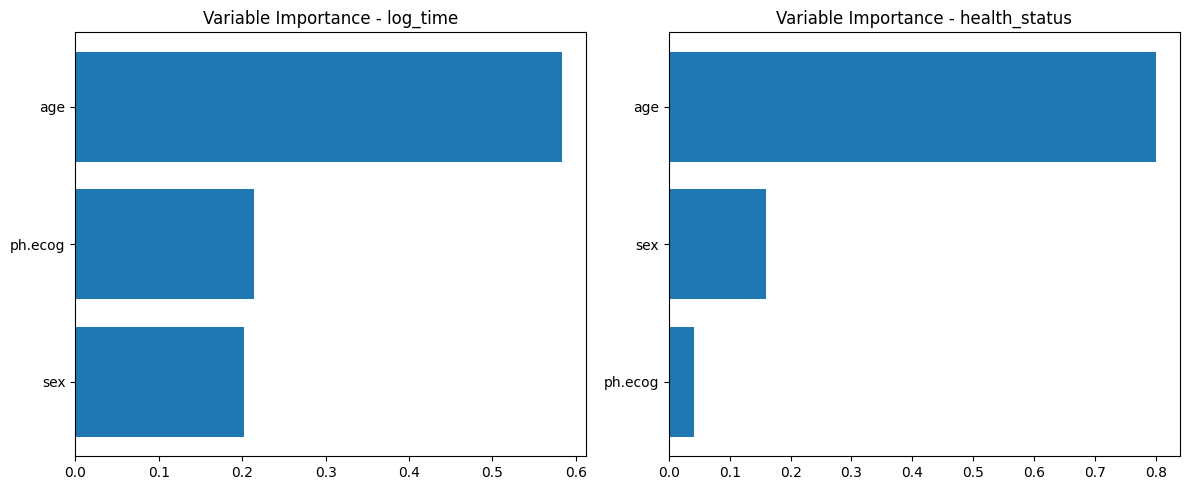

Average Treatment Effects (AIPW):


,Outcome,Comparison,ATE
0,outcome_0,B vs A,0.011760
1,outcome_0,placebo vs A,-0.263888
2,outcome_0,placebo vs B,-0.275647
3,outcome_1,B vs A,-0.231666
4,outcome_1,placebo vs A,0.019756
5,outcome_1,placebo vs B,0.251423



Test Set Predictions (first 5 samples):


,A_outcome_0,A_outcome_1,B_outcome_0,B_outcome_1,placebo_outcome_0,placebo_outcome_1
0,5.660590,0.315100,5.210497,0.390598,5.591504,0.144341
1,5.584289,0.352231,5.034483,0.662400,4.886838,0.410708
2,5.364255,0.279721,5.208544,0.427713,5.501072,0.257715
3,5.467306,0.296532,5.273451,0.388984,5.687326,0.166180
4,5.471690,0.296404,5.273451,0.388984,5.687804,0.099725


In [31]:
# Run causal forest
results = multi_arm_causal_forest(
    X_train, W_train, Y_train,
    X_test, W_test, Y_test,
    num_trees=1000,
    min_node_size=10
)

# Visualize results
plot_results(results)

## Summary and Conclusion

This notebook demonstrates two methods for implementing Multi-arm/Multi-outcome Causal Forests in Python: using the {econml} library and using the a  function`multi_arm_causal_forest()` similar to  {grf} R package.   While {econml} allows for handling multiple treatments and outcomes, the multi_arm_causal_forest()` function provides a more direct implementation with for calculating Average Treatment Effects (ATE) and plotting variable importance for multiple outcomes and treatment arms.

## References

1.  Wager, S., & Athey, S. (2018). Estimation and Inference of Heterogeneous Treatment Effects using Random Forests. JASA.

2.  Athey, S., Tibshirani, J., & Wager, S. (2019). Generalized Random Forests. Ann. Statist.

3.  Multi-arm/multi-outcome implementation available in grf R package